# Carson Richardson
## Compiled using Jupyter

## Summary: 

### For this analysis, I want to decipher the answer to the following questions:
### 1. How have habitual smoking rates changed over time?
### 2. How have historical non-smoking rates changed over time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('tobacco.csv')

list_col = df[['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']]

for i in list_col:
    df[i] = df[i].str.rstrip('%')
    df[i] = df[i].astype('float64')

### Here, we drop a useless column as it adds nothing to our analysis.

In [2]:
useful_df = df.drop('Location 1', axis=1)

### Now we move into exploring the dataset to see what is available now that it has been cleaned.

In [3]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             876 non-null    int64  
 1   State            876 non-null    object 
 2   Smoke everyday   876 non-null    float64
 3   Smoke some days  876 non-null    float64
 4   Former smoker    876 non-null    float64
 5   Never smoked     876 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 41.2+ KB


In [4]:
useful_df.describe()

,Year,Smoke everyday,Smoke some days,Former smoker,Never smoked
count,876.000000,876.000000,876.000000,876.000000,876.000000
mean,2002.591324,16.555479,4.839498,24.321918,54.257306
std,4.593622,3.981661,1.156771,3.501092,5.603022
min,1995.000000,3.600000,1.300000,9.900000,39.500000
25%,1999.000000,13.900000,4.200000,22.900000,51.075000
50%,2003.000000,16.700000,4.900000,24.500000,53.500000
75%,2007.000000,19.100000,5.525000,26.200000,56.200000
max,2010.000000,29.100000,8.500000,33.400000,83.700000


### I decided to set the dataframe index to year to make analysis a little more intuitive

In [5]:
useful_df.set_index('Year')

,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
Year,,,,,
1996,Puerto Rico,9.4,5.1,16.0,69.5
1997,Puerto Rico,9.4,5.0,15.7,69.9
1998,Puerto Rico,10.1,5.2,16.8,67.9
1999,Puerto Rico,9.7,4.0,15.3,71.0
2000,Puerto Rico,9.2,3.9,15.2,71.6
...,...,...,...,...,...
1995,Nationwide (States and DC),19.9,2.6,25.3,51.6
2010,Guam,19.7,6.1,16.6,57.6
2009,Guam,18.9,5.2,11.1,64.8


### As seen below, there are a lot of interesting correlations in the data set. I am most interested in the correlation between year and smoking everyday, which is -0.549 and indicates a negative correlation (as years pass, the rate of people smoking everyday goes down). I am also interested in the rate of people who have never smoked has changed, which shows a small positive correlation of 0.29.

In [6]:
useful_df.corr()

,Year,Smoke everyday,Smoke some days,Former smoker,Never smoked
Year,1.000000,-0.549041,0.347010,0.040750,0.291459
Smoke everyday,-0.549041,1.000000,-0.123137,0.093998,-0.742744
Smoke some days,0.347010,-0.123137,1.000000,0.057212,-0.154750
Former smoker,0.040750,0.093998,0.057212,1.000000,-0.703976
Never smoked,0.291459,-0.742744,-0.154750,-0.703976,1.000000


### Now we begin visualizing the data with the various graphs seen below

<AxesSubplot:xlabel='Year', ylabel='Never smoked'>

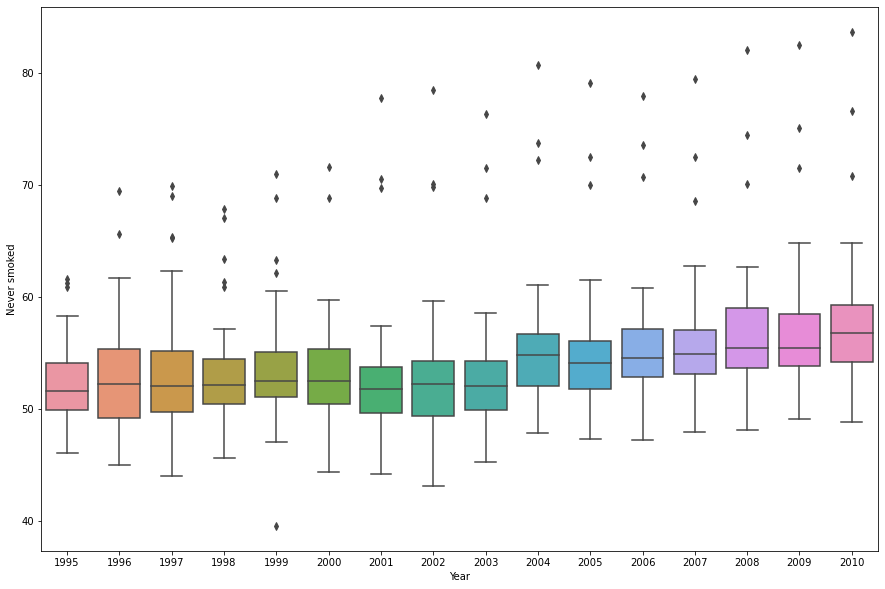

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=useful_df, x='Year', y='Never smoked')

<AxesSubplot:xlabel='Year', ylabel='Smoke everyday'>

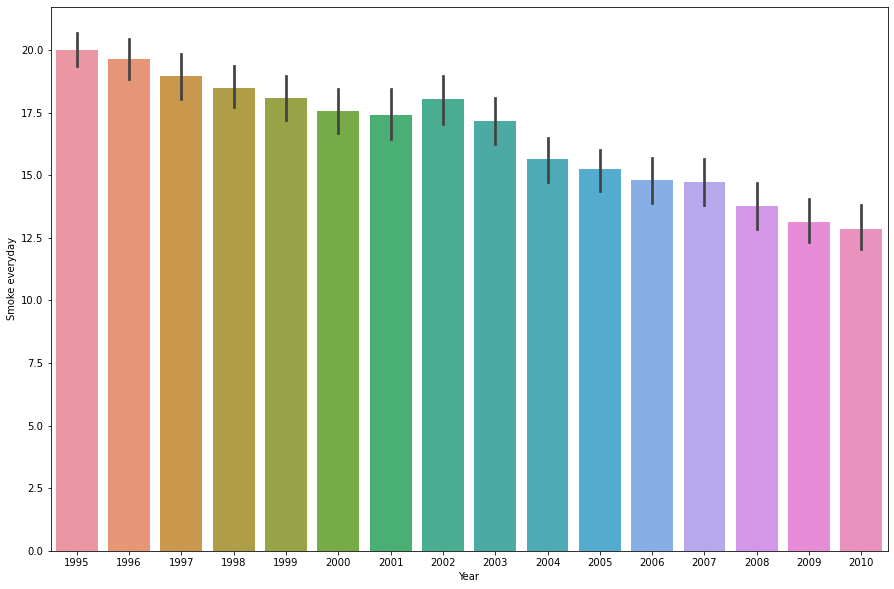

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(data=useful_df, x='Year', y='Smoke everyday')

<AxesSubplot:xlabel='Year', ylabel='Smoke some days'>

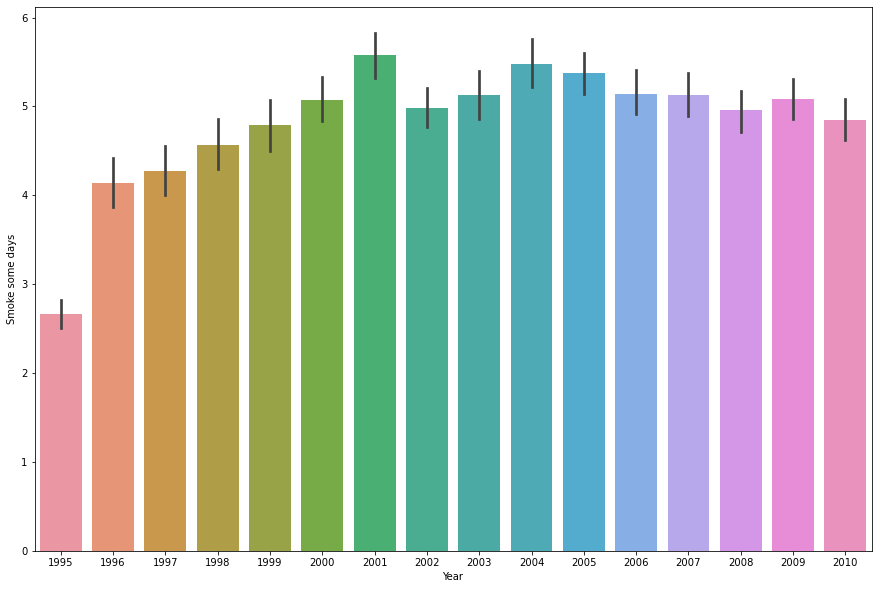

In [9]:
plt.figure(figsize=(15,10))
sns.barplot(data=useful_df, x='Year', y='Smoke some days')

<Figure size 1080x720 with 0 Axes>

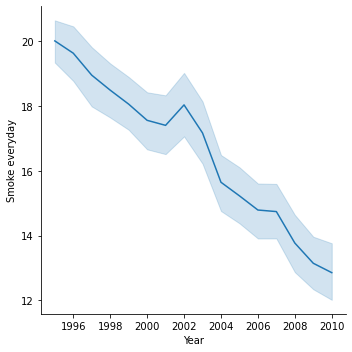

In [10]:
plt.figure(figsize=(15,10))
sns.relplot(data=useful_df, x='Year', y='Smoke everyday', kind="line")

<Figure size 1080x720 with 0 Axes>

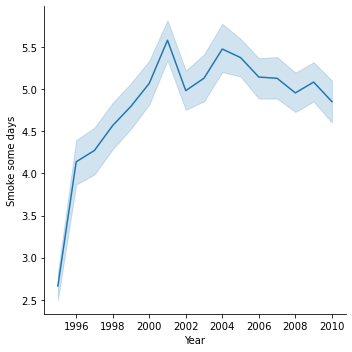

In [11]:
plt.figure(figsize=(15,10))
sns.relplot(data=useful_df, x='Year', y='Smoke some days', kind="line")

### From this graph, we can see a slight increase in the rate of historical non-smokers from approximately 52% to 57%, a 5% increase over roughly 15 years.

<Figure size 1080x720 with 0 Axes>

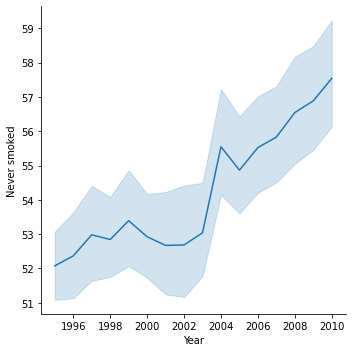

In [12]:
plt.figure(figsize=(15,10))
sns.relplot(data=useful_df, x='Year', y='Never smoked', kind="line")

<AxesSubplot:xlabel='Year', ylabel='Smoke everyday'>

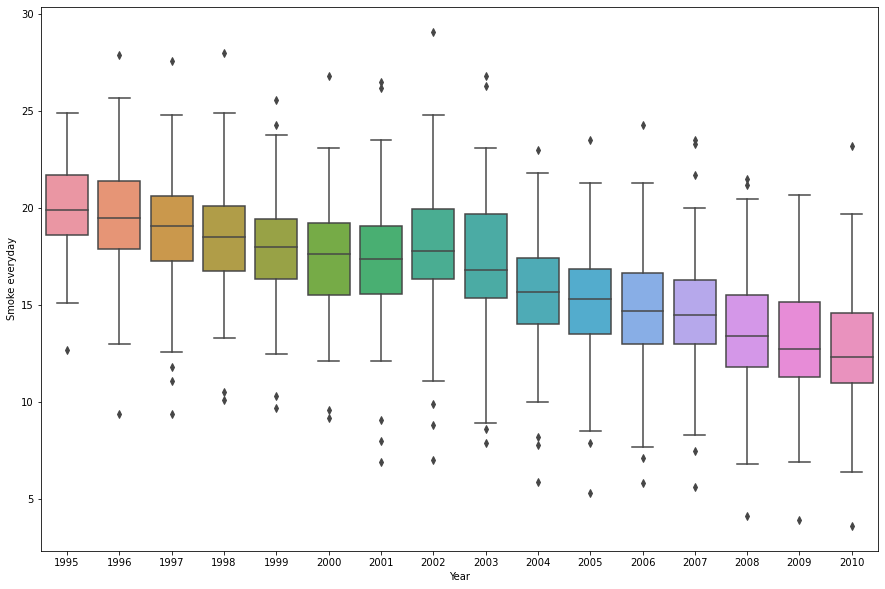

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=useful_df, x='Year', y='Smoke everyday')

### For the most important part of the analysis, we now create a linear regression model using year as the predictor and smoking everyday as the outcome. The equation is: y = -0.4759x + 969.59

### I then created a visualization of the data using a scatterplot and insert the trendline into the plot. The line does trend negatively, which affirms our first exploratory analysis with regard to the visualizations and correlational table.

In [14]:
x = np.array(useful_df.Year).reshape(-1,1)
y = np.array(useful_df['Smoke everyday'])

In [15]:
model = LinearRegression().fit(x,y)

### Here, we can see the R-squared value of this graph, approximately 0.3. This indicates that roughly 30% of the variability in the graph can be attributed to the passage of time.

In [16]:
r2 = model.score(x,y)
r2

0.30144632072054767

In [17]:
intercept = model.intercept_
intercept

969.5850410493356

In [18]:
slope = model.coef_
slope

array([-0.47589818])

In [19]:
prediction = model.predict(x)

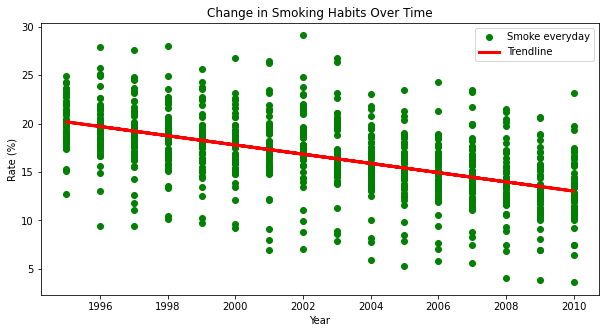

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(data=useful_df, x='Year', y='Smoke everyday', color='green')
plt.plot(useful_df.Year, prediction, color='r', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.title("Change in Smoking Habits Over Time")
plt.legend(labels=['Smoke everyday', 'Trendline'])